## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#read dataset
df=pd.read_csv("ab_data.csv")

In [3]:
# check and review dataset
df.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


There are 5 columns in this dataset including: user_id, timestamp, group,landing_page, converted.

b. Use the below cell to find the number of rows in the dataset.

In [4]:
row_number=df.shape[0]
print ("Number of rows in the dataset is {}.".format(row_number))

Number of rows in the dataset is 294478.


c. The number of unique users in the dataset.

In [5]:
unique_users=df.nunique()['user_id']
print ("Number of unique users in the dataset is : {}.".format(unique_users))

Number of unique users in the dataset is : 290584.


d. The proportion of users converted.

In [6]:
converted_users=sum(df['converted'].values)
converted_proportion=round(converted_users/row_number,3)

print("Proportion of users converted in the dataset is {}.".format(converted_proportion))

Proportion of users converted in the dataset is 0.12.


e. The number of times the `new_page` and `treatment` don't line up.

In [10]:
#find rows for mismatched treatment group and  control group
mismatched_num=df.query("(group == 'treatment' & landing_page !='new_page') or (group=='control' & landing_page !='old_page')")
print("Number of times the new_page and treatment don't line up is {}.".format(len(mismatched_num)))

Number of times the new_page and treatment don't line up is 0.


f. Do any of the rows have missing values?

In [9]:
df[df.isnull().any(axis=1)]

,user_id,timestamp,group,landing_page,converted


   There is no missing values in any row in the current dataset.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [7]:
#find rows for mismatched treatment group and  control group
mismatched_grp=df.query("(group == 'treatment' & landing_page !='new_page') or (group=='control' & landing_page !='old_page')")
#drop these mismatched rows
df.drop(mismatched_grp.index, inplace=True)
# check the row numbers
row_num2=df.shape[0]
print ("Numbers of rows in the cleaned dataset is {}.".format(row_num2) )

Numbers of rows in the cleaned dataset is 290585.


For the rows that the new_page and treament don't line up, we will drop them since we can not judge which page they belong to basing on the current information obtained from the dataset set.


In [8]:
#save the clean dataset as the new dataframe in df2 for the subsequent ananlysis
df.to_csv('ab_newdata.csv', index=False)
df2=pd.read_csv('ab_newdata.csv')

In [11]:
#check and review the new dataset df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


In [12]:
# Double Check all of the correct rows were removed - this should be 0
rows_num_corr=df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]
print("Number of the removed correct rows is {}.".format(rows_num_corr))

Number of the removed correct rows is 0.


`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
users_unique2=df2.user_id.nunique()
print("There are {} unique users_ids in df2".format(users_unique2))

There are 290584 unique users_ids in df2


b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
#check any dupilicates for user_id in df2
duplicate_row=sum(df2['user_id'].duplicated())
print("There are {} duplicates for user_id in df2.".format(duplicate_row))

There are 1 duplicates for user_id in df2.


c. What is the row information for the repeat **user_id**? 

In [18]:
df2[df2.duplicated('user_id', keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
#remove the duplicate row 2862 and confirm the change
df2.drop(df.index[2862], axis=0, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
converted_mean=round(df2['converted'].mean(),3)
print ("Probability of an individual converting is {}.".format(converted_mean))

Probability of an individual converting is 0.12.


Since the converted value is 0 or 1 in the dataset, the probability of converting could be represented as the mean value.

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
converted_mean_con=round(df2.query('group == "control"')['converted'].mean(),3)
print ("Probability of an individual converting in the control group is {}.".format(converted_mean_con))

Probability of an individual converting in the control group is 0.12.


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
converted_mean_tre=round(df2.query('group == "treatment"')['converted'].mean(),3)
print ("Probability of an individual converting in the treatment group is {}.".format(converted_mean_tre))

Probability of an individual converting in the treatment group is 0.119.


d. What is the probability that an individual received the new page?

In [22]:
#number received the new page
new_page_count=df2.query('landing_page == "new_page"').count()
#number for user_id
number_user=new_page_count[0]
# probability of receiving the new page
new_page_prob=round(number_user/df2.shape[0],3)
print("probability of an individual received in the new page is {}.".format(new_page_prob))

probability of an individual received in the new page is 0.5.


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Since the probabilities of an individual converting in both control and treatment group are very close (0.12 vs. 0.119), we don't have sufficient evidence to say that the new treatment page leads more conversions, which is also confirmed by the caculation of probability of an individual received the new page.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Assume the new page does not do better than old page, unless it shows evidence to be better than the old page at a Type I error rate of 5%. The null hypothesis and alnative hypothesis is as below:<br><br> 
                                    **H0: $p_{new}$ <=$p_{old}$**<br>
                                    **H1: $p_{new}$> $p_{old}$**



`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
# since the convert values is 0 or 1, the convert rate could be represented as converted mean.
pnew = round(df2['converted'].mean(),3)
print("Convert rate for Pnew is {}.".format(pnew))

Convert rate for Pnew is 0.12.


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
pold= round(df2['converted'].mean(),3)
print("Convert rate for Pold is {}.".format(pold))

Convert rate for Pold is 0.12.


c. What is $n_{new}$?

In [19]:
Nnew = df2.query("group == 'treatment'").shape[0]
print ("Number of Nnew is {}.".format(Nnew))

Number of Nnew is 145310.


d. What is $n_{old}$?

In [24]:
Nold= df2.query("group == 'control'").shape[0]
print ("Number of Nold is {}.".format(Nold))

Number of Nold is 145274.


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
new_page_converted = np.random.binomial(Nnew, pnew)
print("Number of new page converted is {}.".format(new_page_converted))

Number of new page converted is 17232.


f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.binomial(Nold, pold)
print("Number of old page converted is {}.".format(old_page_converted))

Number of old page converted is 17471.


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
#calculate the difference between the new page converted rate and the old page converted rate
p_diff = (new_page_converted/Nnew) - (old_page_converted/Nold)
print("Difference between Pnew and Pold is {}.".format(p_diff))

Difference between Pnew and Pold is -0.001674554032243994.


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
p_diffs = []
for _ in range(10000):
    new_page_converted1 = np.random.binomial(Nnew, pnew)
    old_page_converted1 = np.random.binomial(Nold, pold)
    diff=(new_page_converted1/Nnew) - (old_page_converted1/Nold)
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

Text(0.5, 1.0, 'Plot of the p_diffs')

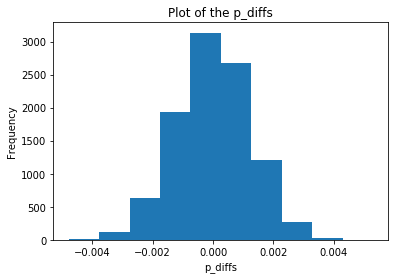

In [29]:
plt.hist(p_diffs)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Plot of the p_diffs')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [ ]:
#convert to numpy array
p_diffs = np.array(p_diffs)

In [ ]:
#compute difference from the original dataset
actual_diffs= df.query('group == "treatment"')['converted'].mean()- df.query('group == "control"')['converted'].mean()

In [ ]:
#caculate the proportion of the p_diffs greater than actual_diffs
p_value=(p_diffs>actual_diffs).mean()
print("Proportion of the p_diffs are greater than the actual difference in original dataset is {}.".format(p_value))

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The proportion of the conversion rate differences in the null distribution were greater than the actual observed difference.
The difference between these two values is called as the p-value.<br>
Since the p-value of 0.9084 is greater than 0.05, we don't have significant evidence to reject the null hypothesis: The new page dose do better than that of the old page. This conclusion is also predicted by the results that we found that the new page has equal converting proportion with that of the old page in the step of 4 (d). 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm
convert_old = df2.query('group == "control"')['converted'].sum()
convert_new = df2.query('group == "treatment"')['converted'].sum()
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_old, n_new], alternative='larger')
print("The z-score is {}". format(z_score))
print("The p-value is {}".format(p_value))

The z-score is -1.2616957421858055
The p-value is 0.8964708551967226


The p-value obtained here (0.8965) is pretty similar to the one computed in the step j (0.9084).

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [34]:
from scipy.stats import norm
critical_value=norm.ppf(1-(0.05))
print("The critical value at 95% confidence level at one side is {}".format(critical_value))

The critical value at 95% confidence level at one side is 1.6448536269514722


Since the absolute value of z-score obtained here (1.26) is less than the critical value (1.64), we accept the null hypothesis: The new page does not do better than that the old page. This result is also consistently indicated by the p-value (0.8964).

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression is the type of regression that should be performed in this case.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [35]:
import statsmodels.api as sm
df2[['treatment', 'ab_page']] = pd.get_dummies(df2['group'])
df2=df2.drop('treatment',axis=1)
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0


c. Use **statsmodels** toimport your regression model. Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [36]:
df2['intercept'] = 1
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sat, 12 Jan 2019   Pseudo R-squ.:               8.077e-06
Time:                        18:20:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

Since the p-value associated with ab_page in logit regression model is 0.19, which is greater than 0.05, thus we don't have sufficent evidence to reject the null hypothesis: There is no relationship between the page and the converting rate, which means that  the old page has the same conversion rate as the new page. The alternative hypothesis for this model is: There is related between the pages to select and the converting rate, which means that there is difference between the conversion rate of the old page and that of the new page.

The p-value associated with ab_page in part 2 is around 0.9. The null hypothesist is that The new page is not
better than that of old page regarding the conversion rate and the alternative hypothesis is  that The new page is
better than that of old page regarding the conversion rate.

Therefore the test in Part III is more sufficient in statistics than that of Part II.



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

More factors should be considered andd involved into the model, since the current analysis only contains two varibles of the conversion and the type of page. For instance, the users with different ages, education levels, job positions and geographic area might have different preferences for selecting the page, which might be related to the current analysis. We know taht adding more related variables to the regression model might prevent bias in the estimate of the other regression coefficient, but can also increase variance of other regression coefficient. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
countries_df = pd.read_csv('.\countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [44]:
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1


In [47]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [49]:
### Create the necessary dummy variables and confirm the change
df_new[['CA', 'US', 'UK']] = pd.get_dummies(df_new['country'])
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [51]:
### Fit Your Linear Model And Obtain the Results
df_new['intercept']=1

logit_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US','UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Sat, 12 Jan 2019   Pseudo R-squ.:               2.323e-05
Time:                        19:15:50   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0506      0.028      1.784      0.074      -0.005       0.106
UK             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

The p-value for the curreent regression model of 0.176 means that we don't have sufficent confidence to reject the null hypothesis, which is consistent with the results from the previous analysis.  The value of p-value is pretty close (0.176 vs. 0.19) when incorporated one more factor in the model, which implies that the different geography area might not have major impact for selecting the pages. 

<a id='conclusions'></a>
## Conclusions
Congratulations on completing the project!


### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.